In [1]:
#Load necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt

In [2]:
#Loading the data set and checking the head
data = pd.read_csv('iris-classification.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#Checking the summary statistics
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
#Checking if any null values exist
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
#Declaring the features and target variables
y = data['species']
x = data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

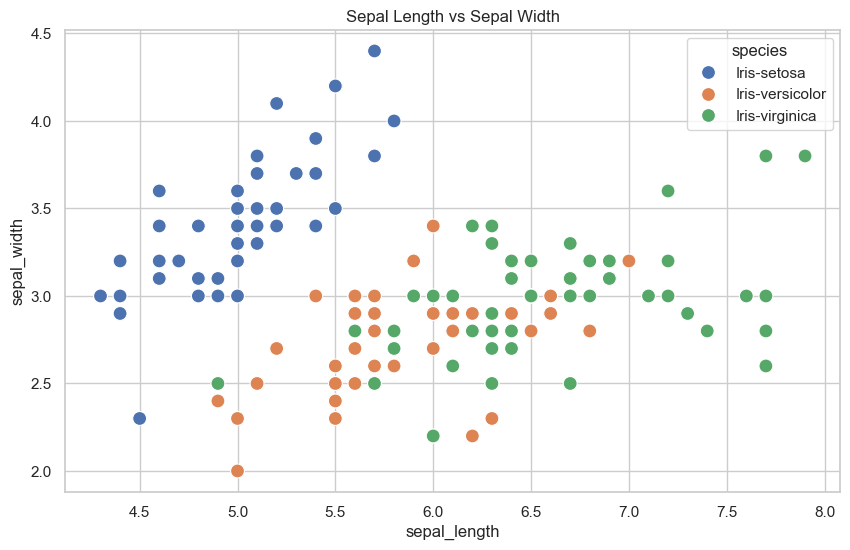

In [6]:
#Plotting the data onto scatter plots to visualize
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x='sepal_length', y='sepal_width', hue='species', s=100)
plt.title('Sepal Length vs Sepal Width')
plt.show()

In [7]:
#Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [8]:
#Creating and training the model
model = LogisticRegression(max_iter=200)
model.fit(x_train, y_train)
print("Model training complete.")

Model training complete.


In [9]:
#making predictions on the test set
predictions = model.predict(x_test)
results = pd.DataFrame({'Actual species': y_test, 'Predicted species': predictions})
print(results.head())

      Actual species Predicted species
73   Iris-versicolor   Iris-versicolor
18       Iris-setosa       Iris-setosa
118   Iris-virginica    Iris-virginica
78   Iris-versicolor   Iris-versicolor
76   Iris-versicolor   Iris-versicolor


In [10]:
#Checking the accuracy of the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, predictions)
print(f"Model Accuracy: {accuracy*100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))

Model Accuracy: 100.00%

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


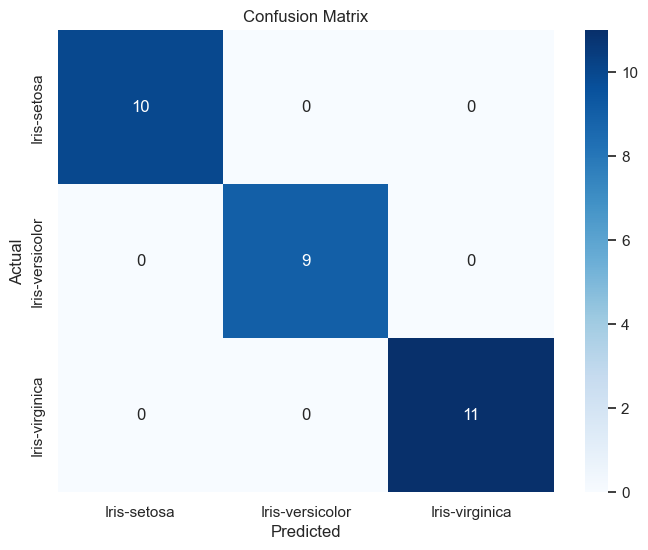

In [11]:
#Visualizing the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Predict Iris Species Using Manual Input
You can manually set the values for sepal length, sepal width, petal length, and petal width in the next code cell to get a prediction from the model.

In [12]:
import pandas as pd

# Manually input feature values for prediction
sepal_length = 8.0
sepal_width = 0.9
petal_length = 9.5
petal_width = 5.5

# Create a DataFrame with the feature names
input_df = pd.DataFrame({
    'sepal_length': [sepal_length],
    'sepal_width': [sepal_width],
    'petal_length': [petal_length],
    'petal_width': [petal_width]
})

predicted_species = model.predict(input_df)[0]
print(f"Predicted Species: {predicted_species}")



Predicted Species: Iris-virginica


In [16]:
# Additional accuracy analysis for manual predictions
print("="*50)
print("MANUAL PREDICTION ACCURACY ANALYSIS")
print("="*50)

# Test the model with multiple manual inputs to show accuracy
test_manual_inputs = [
    [9.1, 1.5, 6.4, 2.2],  # Iris-setosa
    [7.0, 3.2, 4.7, 1.4],  # Iris-versicolor  
    [6.3, 3.3, 6.0, 2.5],  # Iris-virginica
    [4.9, 3.0, 1.4, 0.2],  # Iris-setosa
    [6.4, 3.2, 4.5, 1.5]   # Iris-versicolor
]

expected_species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor']

print("Testing multiple manual predictions:")
print("-" * 40)

correct_predictions = 0
total_predictions = len(test_manual_inputs)

for i, (features, expected) in enumerate(zip(test_manual_inputs, expected_species)):
    # Create DataFrame for prediction
    test_df = pd.DataFrame({
        'sepal_length': [features[0]],
        'sepal_width': [features[1]], 
        'petal_length': [features[2]],
        'petal_width': [features[3]]
    })
    
    # Get prediction and probability
    predicted = model.predict(test_df)[0]
    probability = model.predict_proba(test_df)[0]
    confidence = max(probability) * 100
    
    # Check if prediction is correct
    is_correct = predicted == expected
    if is_correct:
        correct_predictions += 1
    
    print(f"Test {i+1}: {features}")
    print(f"  Expected: {expected}")
    print(f"  Predicted: {predicted}")
    print(f"  Confidence: {confidence:.2f}%")
    print(f"  Correct: {'✓' if is_correct else '✗'}")
    print()

# Calculate manual prediction accuracy
manual_accuracy = (correct_predictions / total_predictions) * 100
print(f"Manual Prediction Accuracy: {manual_accuracy:.2f}% ({correct_predictions}/{total_predictions})")
print(f"Model Test Set Accuracy: {accuracy*100:.2f}%")


MANUAL PREDICTION ACCURACY ANALYSIS
Testing multiple manual predictions:
----------------------------------------
Test 1: [9.1, 1.5, 6.4, 2.2]
  Expected: Iris-setosa
  Predicted: Iris-virginica
  Confidence: 98.82%
  Correct: ✗

Test 2: [7.0, 3.2, 4.7, 1.4]
  Expected: Iris-versicolor
  Predicted: Iris-versicolor
  Confidence: 85.91%
  Correct: ✓

Test 3: [6.3, 3.3, 6.0, 2.5]
  Expected: Iris-virginica
  Predicted: Iris-virginica
  Confidence: 99.33%
  Correct: ✓

Test 4: [4.9, 3.0, 1.4, 0.2]
  Expected: Iris-setosa
  Predicted: Iris-setosa
  Confidence: 96.53%
  Correct: ✓

Test 5: [6.4, 3.2, 4.5, 1.5]
  Expected: Iris-versicolor
  Predicted: Iris-versicolor
  Confidence: 84.71%
  Correct: ✓

Manual Prediction Accuracy: 80.00% (4/5)
Model Test Set Accuracy: 100.00%
